In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('fraud_detection.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.shape

(6362620, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
if df.isnull().values.any():
    print('missing values')
    df.dropma(inplace=True)
    print('shape :' ,df.shape)
else:
    print('no missing value')

no missing value


In [9]:
import seaborn as sns

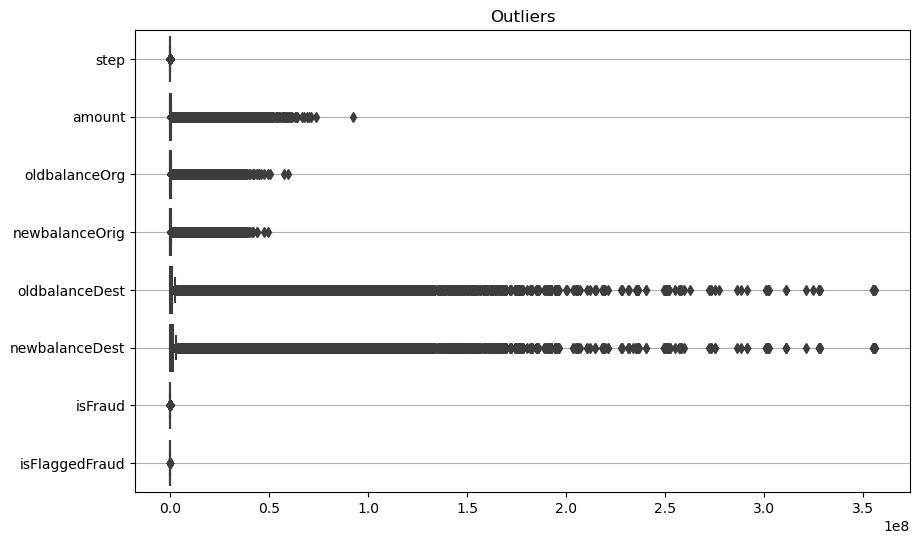

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h') # horizontal
plt.title('Outliers')
plt.grid(axis='y')
plt.show()

In [11]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

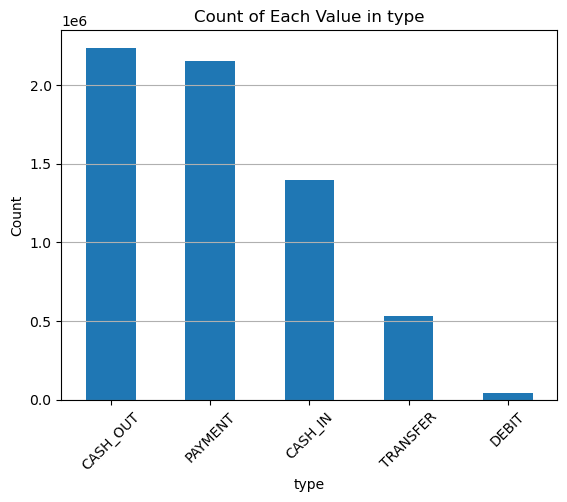

In [13]:
#plt.pyplot()
df['type'].value_counts().plot(kind='bar')
plt.title(f'Count of Each Value in type')
plt.grid(axis='y', alpha=1)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [14]:
df['type'].replace({'CASH_OUT':0,'PAYMENT':1,'CASH_IN':2,'TRANSFER':3,'DEBIT':4},inplace=True)

In [15]:
df['type'].value_counts()

type
0    2237500
1    2151495
2    1399284
3     532909
4      41432
Name: count, dtype: int64

In [16]:
df['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [17]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

In [18]:
correlation = df['step'].corr(df['isFraud'])
print(f"Correlation coefficient: {correlation}")

# Plot a scatter plot with a regression line
#sns.lmplot(x='variable1', y='variable2', data=df)
#plt.title(f'Scatter Plot with Regression Line\nCorrelation: {correlation:.2f}')
#plt.show()

Correlation coefficient: 0.03157756863269319


In [19]:
df1 = df.drop('step', axis=1)

In [20]:
df1.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [21]:
df.nameOrig.unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

In [22]:
df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [23]:
df2 = df1.drop('nameOrig', axis=1)
df2.head()

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,3,181.00,181.0,0.00,C553264065,0.0,0.0,1,0
3,0,181.00,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [24]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

In [25]:
df3 = df2.drop('nameDest', axis=1)
df3.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,3,181.00,181.0,0.00,0.0,0.0,1,0
3,0,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [26]:
correlation = df['isFraud'].corr(df['isFlaggedFraud'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.04410919651381606


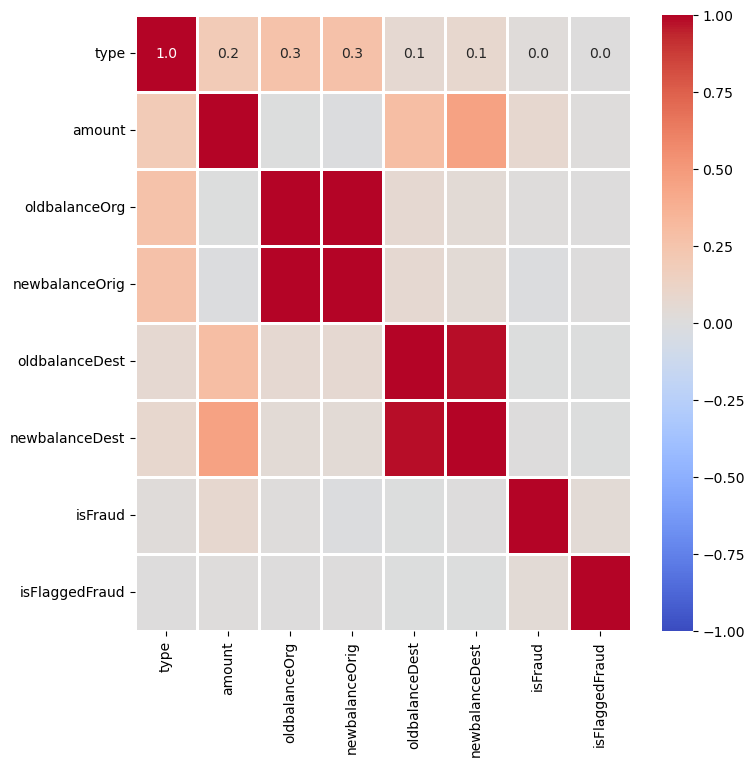

In [27]:
plt.figure(figsize=(8, 8))
sns.heatmap(df3.corr(), 
            annot=True, 
            linewidths=0.9, 
            fmt=".1f", vmin=-1, vmax=1,
            cmap='coolwarm')
plt.show()

In [28]:
df3.drop(['newbalanceOrig', 'oldbalanceDest'], axis=1, inplace=True)

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceDest  float64
 4   isFraud         int64  
 5   isFlaggedFraud  int64  
dtypes: float64(3), int64(3)
memory usage: 291.3 MB


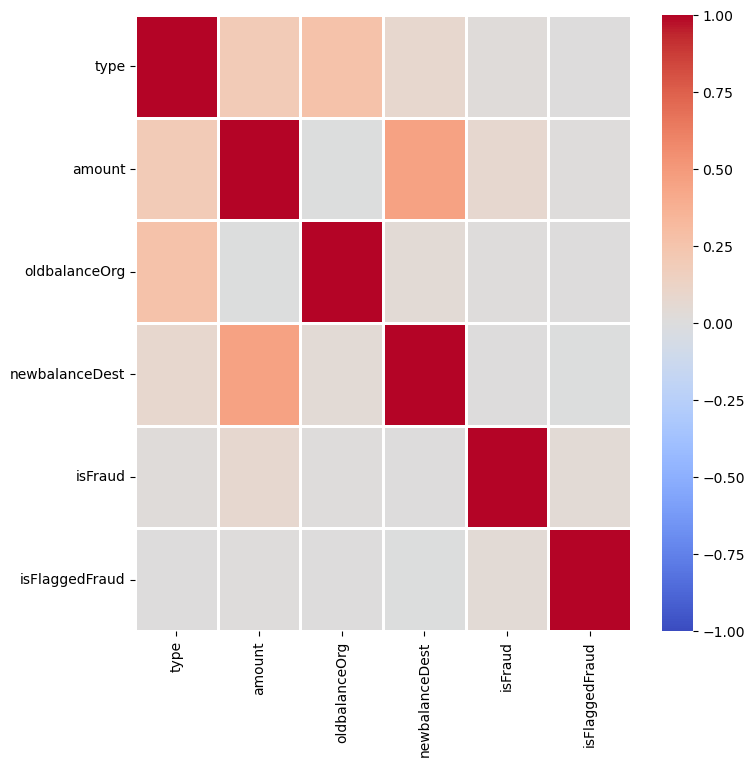

In [30]:
plt.figure(figsize=(8, 8))
sns.heatmap(df3.corr(),  
            linewidths=0.9, 
            fmt=".1f", vmin=-1, vmax=1,
            cmap='coolwarm')
plt.show()

In [32]:
X = df3.drop(['isFraud'], axis=1)
print('X shape is : ' , X.shape)
print()

X shape is :  (6362620, 5)



In [33]:
Y = df3['isFraud']
print('Y shape is : ' , Y.shape)
print()

Y shape is :  (6362620,)



In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=42,shuffle=True)
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.3,random_state=42,shuffle=True)


X_train.shape,X_test.shape,X_val.shape,Y_train.shape,Y_test.shape,Y_val.shape

((3117683, 5), (1908786, 5), (1336151, 5), (3117683,), (1908786,), (1336151,))

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [36]:
logistic_model = LogisticRegression(max_iter=1000)  # max_iter to ensure convergence

# Standardize the features using a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('logistic', logistic_model)   # Logistic Regression model
])

In [37]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(max_iter=1000))])

In [38]:
y_val_pred = pipeline.predict(X_val)

In [39]:
print("Validation Accuracy:", accuracy_score(Y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(Y_val, y_val_pred))

Validation Accuracy: 0.9987411602431162
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1334435
           1       0.58      0.07      0.13      1716

    accuracy                           1.00   1336151
   macro avg       0.79      0.54      0.56   1336151
weighted avg       1.00      1.00      1.00   1336151



In [40]:
y_test_pred = pipeline.predict(X_test)

In [41]:
print("Test Accuracy:", accuracy_score(Y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(Y_test, y_test_pred))

Test Accuracy: 0.9987405607543224
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.56      0.06      0.11      2435

    accuracy                           1.00   1908786
   macro avg       0.78      0.53      0.56   1908786
weighted avg       1.00      1.00      1.00   1908786



In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [44]:
num_classes = len(set(Y_train))  # Number of unique classes
y_train_cat = to_categorical(Y_train, num_classes)
y_val_cat = to_categorical(Y_val, num_classes)
y_test_cat = to_categorical(Y_test, num_classes)

In [45]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(num_classes, activation='softmax')  # Output layer
])

C:\Users\abhil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit(X_train_scaled, y_train_cat,
                    epochs=5,  # Number of epochs
                    batch_size=32,  # Batch size
                    validation_data=(X_val_scaled, y_val_cat))

Epoch 1/5
97428/97428 ━━━━━━━━━━━━━━━━━━━━ 119s 1ms/step - accuracy: 0.9992 - loss: 0.0087 - val_accuracy: 0.9994 - val_loss: 0.0053
Epoch 2/5
97428/97428 ━━━━━━━━━━━━━━━━━━━━ 119s 1ms/step - accuracy: 0.9994 - loss: 0.0053 - val_accuracy: 0.9995 - val_loss: 0.0033
Epoch 3/5
97428/97428 ━━━━━━━━━━━━━━━━━━━━ 121s 1ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 4/5
97428/97428 ━━━━━━━━━━━━━━━━━━━━ 120s 1ms/step - accuracy: 0.9994 - loss: 0.0042 - val_accuracy: 0.9995 - val_loss: 0.0025
Epoch 5/5
97428/97428 ━━━━━━━━━━━━━━━━━━━━ 122s 1ms/step - accuracy: 0.9995 - loss: 0.0047 - val_accuracy: 0.9994 - val_loss: 0.0028


In [48]:
y_test_pred = model.predict(X_test_scaled)
y_test_pred_classes = y_test_pred.argmax(axis=1)

59650/59650 ━━━━━━━━━━━━━━━━━━━━ 29s 483us/step


In [50]:
print("Test Accuracy:", accuracy_score(Y_test, y_test_pred_classes))
print("Test Classification Report:\n", classification_report(Y_test, y_test_pred_classes))

Test Accuracy: 0.9993912361050427
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.94      0.56      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.97      0.78      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786



In [51]:
import joblib


joblib.dump(model, 'model.pkl')

['model.pkl']

In [54]:
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming X_train is your training feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Load the trained model and scaler
model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')  # Load the previously fitted scaler

def preprocess_input(input_data):
    # Convert the input data to a DataFrame
    input_df = pd.DataFrame([input_data], columns=['type', 'amount', 'oldbalanceOrg', 'newbalanceDest', 'isFlaggedFraud'])

    # Apply the same scaling used during training
    input_scaled = scaler.transform(input_df)

    return input_scaled

def predict(input_data):
    # Preprocess the input data
    input_processed = preprocess_input(input_data)

    # Make predictions
    y_pred = model.predict(input_processed)

    # Convert predictions to class labels
    y_pred_class = y_pred.argmax(axis=1)

    return y_pred_class[0]  # Return the first prediction as a scalar value

# Example usage
input_data = {
    'type': 1,
    'amount': 1500.00,
    'oldbalanceOrg': 5000.00,
    'newbalanceDest': 4000.00,
    'isFlaggedFraud': 0
}

predicted_class = predict(input_data)
print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: 0
